# EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import config
import numpy as np
import plotly.express as px

In [2]:
sns.set_style('darkgrid')

In [3]:
import sqlalchemy
database_username = config.user
database_password = config.password
database_ip       = config.host
database_name     = 'Passengers'
conn = sqlalchemy.create_engine('mysql+mysqlconnector://{0}:{1}@{2}/{3}'.
                                               format(database_username, database_password, 
                                                      database_ip, database_name))

In [58]:
df = pd.read_sql("""SELECT * 
                    FROM Passengers.city_data
                    WHERE year < 2019""", con=conn, index_col='index')

df.head()

ds        city  PASSENGERS           Type  Month  Year  \
index                                                                  
0     2010-01-01     Atlanta     2735491       Domestic      1  2010   
1     2010-01-01  Washington     1929494       Domestic      1  2010   
2     2010-01-01   Singapore     1681005  International      1  2010   
3     2010-01-01      Berlin      489487  International      1  2010   
4     2010-01-01       Paris     4154249  International      1  2010   

       temperature_mean  precipitation  rain_days  pressure  \
index                                                         
0                   3.6          137.0        7.0   1019.50   
1                   0.4           57.0        8.0   1016.70   
2                  27.5           70.0        8.0   1011.60   
3                  -4.9           21.0        7.0   1014.78   
4                   0.6           36.0        7.0   1015.60   

       cost_of_living_index  population  city_ascii      lat       lng  \
index                                                                    
0                    100.99    429193.0     Atlanta  33.7627  -84.4225   
1                     98.19    605085.0  Washington  38.9047  -77.0163   
2                     65.94   5074252.0   Singapore   1.2930  103.8558   
3                    115.24   3450395.0      Berlin  52.5218   13.4015   
4                    130.30  10460118.0       Paris  48.8667    2.3333   

             country iso2 iso3  
index                           
0      United States   US  USA  
1      United States   US  USA  
2          Singapore   SG  SGP  
3            Germany   DE  DEU  
4             France   FR  FRA

## ANOVA for Destinations

I want to check if the destinations are all from the same population, or in other words whether a single linear regression model is appropriate to apply to all destionations. I'll do this using an ANOVA of all cities.

In [195]:
testing = df[['city', 'PASSENGERS']]

In [197]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'PASSENGERS ~ C(city)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                sum_sq      df            F  PR(>F)
C(city)   9.116372e+15    41.0  1281.337369     0.0
Residual  7.985853e+14  4602.0          NaN     NaN


You should not perform multiple t-tests

In [205]:
nycdata = df[df['city'] == 'New York City']['PASSENGERS']
otherdata = df[df['city'] == 'Phuket']['PASSENGERS']

In [206]:
# Calculate the 2-sided p-value for a t-test comparing the two destinations
from scipy import stats

stats.ttest_ind(nycdata, otherdata, equal_var=False)[1]

9.566013587153424e-108

In [207]:
from plotly.tools import FigureFactory as FF

In [249]:
testing

city  PASSENGERS
index                           
0            Atlanta     2735491
1         Washington     1929494
2          Singapore     1681005
3             Berlin      489487
4              Paris     4154249
...              ...         ...
4639       Las Vegas     1728205
4640   New York City     3794306
4641     Minneapolis     1295947
4642     Los Angeles     3491734
4643           Miami     2267294

[4644 rows x 2 columns]

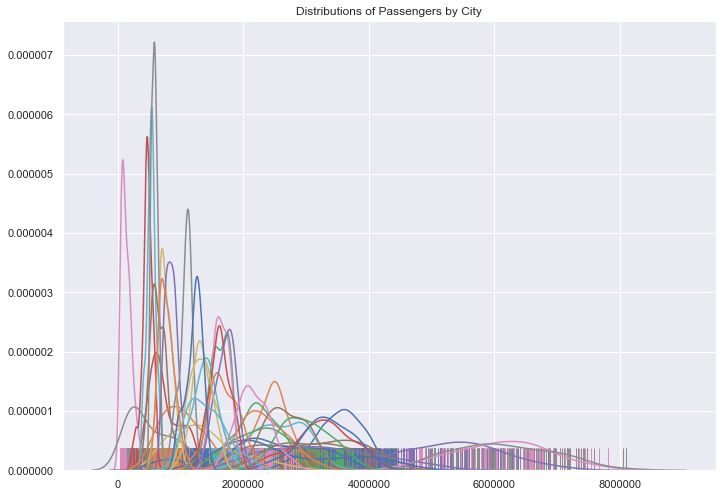

In [255]:
unique_vals = testing['city'].unique()

# Use a list comprehension to create list of sliced dataframes
targets = [testing.loc[testing['city'] == val] for val in unique_vals]

# Iterate through list and plot the sliced dataframe
for target in targets:
    sns.distplot(target[['PASSENGERS']], hist=False, rug=True)

sns.set(rc={'figure.figsize':(11.7,10)})
    
plt.title('Distributions of Passengers by City')
plt.show()

In [171]:
scaled_df = pd.DataFrame((df['PASSENGERS'] - df['PASSENGERS'].mean()) / df['PASSENGERS'].std())
scaled_df.head()

PASSENGERS
index            
0        0.481844
1       -0.069709
2       -0.239753
3       -1.055122
4        1.452717

In [173]:
scaled_df['temperature_mean'] = (df['temperature_mean'] - df['temperature_mean'].mean()) / df['temperature_mean'].std()
scaled_df['precipitation'] = (df['precipitation'] - df['precipitation'].mean()) / df['precipitation'].std()
scaled_df['rain_days'] = (df['rain_days'] - df['rain_days'].mean()) / df['rain_days'].std()
scaled_df['pressure'] = (df['pressure'] - df['pressure'].mean()) / df['pressure'].std()
scaled_df['cost_of_living_index'] = (df['cost_of_living_index'] - df['cost_of_living_index'].mean()) / df['cost_of_living_index'].std()
scaled_df['population'] = (df['population'] - df['population'].mean()) / df['population'].std()
scaled_df['ds'] = df['ds']
scaled_df['city'] = df['city']
scaled_df['Type'] = df['Type']
scaled_df['Month'] = df['Month']
scaled_df['Year'] = df['Year']

scaled_df.head()

PASSENGERS  temperature_mean  precipitation  rain_days  pressure  \
index                                                                     
0        0.481844         -1.413620       0.625382  -0.036362  0.891433   
1       -0.069709         -1.757200      -0.303915   0.177338  0.316466   
2       -0.239753          1.152496      -0.152904   0.177338 -0.730797   
3       -1.055122         -2.326255      -0.722099  -0.036362 -0.077798   
4        1.452717         -1.735727      -0.547856  -0.036362  0.090586   

       cost_of_living_index  population         ds        city           Type  \
index                                                                           
0                  1.100576   -0.502236 2010-01-01     Atlanta       Domestic   
1                  0.924998   -0.475933 2010-01-01  Washington       Domestic   
2                 -1.097282    0.192392 2010-01-01   Singapore  International   
3                  1.994142   -0.050441 2010-01-01      Berlin  International   
4                  2.938500    0.997802 2010-01-01       Paris  International   

       Month  Year  
index               
0          1  2010  
1          1  2010  
2          1  2010  
3          1  2010  
4          1  2010

In [184]:
scaled_monthly_totals = scaled_df.groupby(['ds'])['PASSENGERS', 'temperature_mean', 'precipitation', 'rain_days', 'pressure', 'population', 'cost_of_living_index'].mean().reset_index()
scaled_monthly_totals.head()

ds  PASSENGERS  temperature_mean  precipitation  rain_days  \
0 2010-01-01   -0.350971         -1.044571      -0.200179  -0.091527   
1 2010-02-01   -0.406953         -0.915978      -0.199099  -0.134101   
2 2010-03-01   -0.193808         -0.475765       0.113729   0.011126   
3 2010-04-01   -0.252630         -0.060522      -0.126430  -0.046854   
4 2010-05-01   -0.172228          0.307279      -0.066323  -0.045198   

   pressure  population  cost_of_living_index  
0  0.301818    -0.01548              0.305707  
1 -0.206018    -0.01548              0.305707  
2 -0.007716    -0.01548              0.305707  
3 -0.201813    -0.01548              0.305707  
4 -0.316988    -0.01548              0.305707

In [189]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=scaled_monthly_totals['ds'], 
                         y=scaled_monthly_totals['PASSENGERS'], 
                         mode='lines',
                         name='Normalized Average Passenger Volume',
                         line_color = 'rgb(0, 48, 143)'))
fig.add_trace(go.Scatter(x=scaled_monthly_totals['ds'], 
                         y=scaled_monthly_totals['temperature_mean'],
                         mode='lines',
                         name='Normalized Average Temperature',
                         line_color='rgb(200,0,100)'))
fig.add_trace(go.Scatter(x=scaled_monthly_totals['ds'], 
                         y=scaled_monthly_totals['precipitation'],
                         mode='lines',
                         name='Normalized Average Precipitation',
                         line_color='rgb(77,166,255)'))
fig.add_trace(go.Scatter(x=scaled_monthly_totals['ds'], 
                         y=scaled_monthly_totals['rain_days'],
                         mode='lines',
                         name='Normalized Average Rain Days',
                         line_color='rgb(0, 128, 85)'))
fig.add_trace(go.Scatter(x=scaled_monthly_totals['ds'], 
                         y=scaled_monthly_totals['pressure'],
                         mode='lines',
                         name='Normalized Average Pressure',
                         line_color='rgb(255,77,77)'))
fig.add_trace(go.Scatter(x=scaled_monthly_totals['ds'], 
                         y=scaled_monthly_totals['population'],
                         mode='lines',
                         name='Normalized Average Population',
                         line_color='rgb(200,0,100)'))
fig.add_trace(go.Scatter(x=scaled_monthly_totals['ds'], 
                         y=scaled_monthly_totals['cost_of_living_index'],
                         mode='lines',
                         name='Normalized Average Cost of Living Index',
                         line_color='rgb(200,0,100)'))


fig.update_layout(title='Normalized Passenger Volume Activity 2010-2018 vs. Normalized Temperature',
                  xaxis_title='Year')
fig.show()

In [5]:
import plotly.express as px

In [7]:
px.line(df, x="ds", y="PASSENGERS", title='Passenger volume', color='city')



In [145]:
domesticdf = df[df['Type'] == 'Domestic']

In [146]:
internationaldf = df[df['Type'] == 'International']

In [147]:
px.line(domesticdf, x="ds", y="PASSENGERS", title='Passenger volume', color='city')

In [148]:
px.line(internationaldf, x="ds", y="PASSENGERS", title='Passenger volume', color='city')

In [8]:
top_10df = df.groupby('city')['PASSENGERS'].mean().sort_values(ascending=False).reset_index()[:10]
top_10df

city    PASSENGERS
0          Tokyo  6.156525e+06
1         London  6.107012e+06
2          Paris  5.370523e+06
3        Atlanta  3.519556e+06
4  New York City  3.327171e+06
5      Barcelona  3.267139e+06
6           Rome  3.260747e+06
7        Chicago  3.260544e+06
8    Los Angeles  2.997224e+06
9          Dubai  2.895379e+06

Text(0.5, 0.92, 'Cities with Highest Average Passenger Traffic')

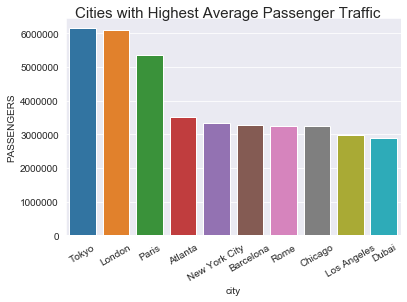

In [9]:
top_10 = sns.barplot(x=top_10df['city'], y=top_10df['PASSENGERS'], data=top_10df)
top_10.set_xticklabels(labels = top_10.get_xticklabels(), rotation=30)
top_10.figure.suptitle('Cities with Highest Average Passenger Traffic', y=0.92,fontsize = 15)

In [10]:
top_10 = list(df.groupby(['city'])['PASSENGERS'].mean().sort_values(ascending=False).reset_index().city)[:10]
top_10

['Tokyo',
 'London',
 'Paris',
 'Atlanta',
 'New York City',
 'Barcelona',
 'Rome',
 'Chicago',
 'Los Angeles',
 'Dubai']

In [11]:
px.line(df[df['city'].isin(top_10)], x='ds', y='PASSENGERS', title='Passenger Volume of top 10 airports', color='city')

In [134]:
px.line(df, x='ds', y='temperature_mean', title='Temperature of Destinations', color='city')

In [208]:
monthly_passengers = df.groupby(['Year', 'Month'])['PASSENGERS'].mean().reset_index()

In [209]:
px.bar(monthly_passengers, x="Month", y="PASSENGERS", title='Average Passenger Volume by Month')



In [227]:
color_continuous_scale=px.colors.diverging.BrBG

TypeError: 'color_continuous_scale' is an invalid keyword argument for print()

In [246]:
fig = go.Figure()
fig.add_trace(go.Box(y=monthly_passengers[monthly_passengers['Month'] == 1]['PASSENGERS'], name='January',
                marker_color = '#33BBFF'))
fig.add_trace(go.Box(y=monthly_passengers[monthly_passengers['Month'] == 2]['PASSENGERS'], name = 'February',
                marker_color = '#3393FF'))
fig.add_trace(go.Box(y=monthly_passengers[monthly_passengers['Month'] == 3]['PASSENGERS'], name = 'March',
                marker_color = '#3377FF'))
fig.add_trace(go.Box(y=monthly_passengers[monthly_passengers['Month'] == 4]['PASSENGERS'], name = 'April',
                marker_color = 'darkblue'))
fig.add_trace(go.Box(y=monthly_passengers[monthly_passengers['Month'] == 5]['PASSENGERS'], name = 'May',
                marker_color = 'rgb(107,174,214)'))
fig.add_trace(go.Box(y=monthly_passengers[monthly_passengers['Month'] == 6]['PASSENGERS'], name = 'June',
                marker_color = '#FFC433'))
fig.add_trace(go.Box(y=monthly_passengers[monthly_passengers['Month'] == 7]['PASSENGERS'], name = 'July',
                marker_color = '#FF851B'))
fig.add_trace(go.Box(y=monthly_passengers[monthly_passengers['Month'] == 8]['PASSENGERS'], name = 'August',
                marker_color = '#FF7D33'))
fig.add_trace(go.Box(y=monthly_passengers[monthly_passengers['Month'] == 9]['PASSENGERS'], name = 'September',
                marker_color = '#FFC133'))
fig.add_trace(go.Box(y=monthly_passengers[monthly_passengers['Month'] == 10]['PASSENGERS'], name = 'October',
                marker_color = '#E0FF33'))
fig.add_trace(go.Box(y=monthly_passengers[monthly_passengers['Month'] == 11]['PASSENGERS'], name = 'November',
                marker_color = '#339FFF'))
fig.add_trace(go.Box(y=monthly_passengers[monthly_passengers['Month'] == 12]['PASSENGERS'], name = 'December',
                marker_color = '#3D9970'))

fig.update_layout(title='Monthly Average Passenger Volume',
                  xaxis_title='Month',
                  yaxis_title='Number of Passengers')
fig.show()

In [13]:
px.line(df.groupby(['Year', 'city'])['PASSENGERS'].sum().reset_index(), x="Year", y="PASSENGERS", title='Total Passenger Volume by Year', color='city')

In [14]:
px.line(df.groupby(['Year', 'city'])['PASSENGERS'].mean().reset_index(), x="Year", y="PASSENGERS", title='Average Passenger Volume by Year', color='city')


In [15]:
px.scatter(df.groupby(['city'])['PASSENGERS', 'population'].mean().reset_index(), x="population", y="PASSENGERS", title='Population vs. Passenger volume', color='city')

In [16]:
px.scatter(df.groupby(['city'])['PASSENGERS', 'temperature_mean'].mean().reset_index(), x="temperature_mean", y="PASSENGERS", title='Population vs. Passenger volume', color='city')


In [17]:
px.scatter(df, x="population", y="cost_of_living_index", color="city",
                 size='PASSENGERS', hover_data=['city'], title='Population vs. Cost of Living')


In [18]:
numeric = df[['PASSENGERS', 'temperature_mean', 'precipitation', 'rain_days', 'pressure', 'cost_of_living_index', 'population']]

In [19]:
numeric

PASSENGERS  temperature_mean  precipitation  rain_days  pressure  \
index                                                                     
0         2735491               3.6          137.0        7.0   1019.50   
1         1929494               0.4           57.0        8.0   1016.70   
2         1681005              27.5           70.0        8.0   1011.60   
3          489487              -4.9           21.0        7.0   1014.78   
4         4154249               0.6           36.0        7.0   1015.60   
...           ...               ...            ...        ...       ...   
4747      1728205               2.9           28.0        4.0   1021.40   
4748      3794306               4.7          175.0       11.0   1019.10   
4749      1295947              -3.3           39.0        4.0   1018.50   
4750      3491734              14.8           37.0        2.0   1017.90   
4751      2267294              22.2           40.0        2.0   1019.20   

       cost_of_living_index  population  
index                                    
0                    100.99    429193.0  
1                     98.19    605085.0  
2                     65.94   5074252.0  
3                    115.24   3450395.0  
4                    130.30  10460118.0  
...                     ...         ...  
4747                  70.97    644644.0  
4748                 100.00   8398748.0  
4749                  81.46    425403.0  
4750                  82.30   3990456.0  
4751                  86.01    470914.0  

[4752 rows x 7 columns]

In [20]:
numeric.corr()

PASSENGERS  temperature_mean  precipitation  rain_days  \
PASSENGERS              1.000000          0.114852      -0.025413  -0.052711   
temperature_mean        0.114852          1.000000       0.180624  -0.091257   
precipitation          -0.025413          0.180624       1.000000   0.703348   
rain_days              -0.052711         -0.091257       0.703348   1.000000   
pressure                0.040833         -0.402321      -0.187537  -0.176667   
cost_of_living_index    0.213776         -0.207407      -0.053634   0.108566   
population              0.593974          0.079401       0.070917   0.010878   

                      pressure  cost_of_living_index  population  
PASSENGERS            0.040833              0.213776    0.593974  
temperature_mean     -0.402321             -0.207407    0.079401  
precipitation        -0.187537             -0.053634    0.070917  
rain_days            -0.176667              0.108566    0.010878  
pressure              1.000000              0.110970   -0.136455  
cost_of_living_index  0.110970              1.000000   -0.052135  
population           -0.136455             -0.052135    1.000000

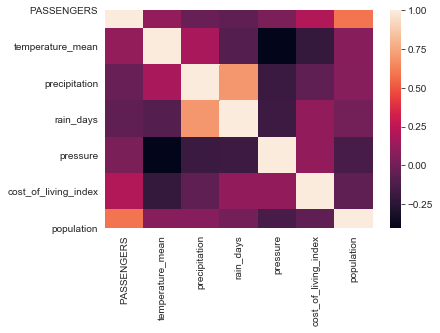

In [21]:
sns.heatmap(numeric.corr())

### Distributions of Numeric Variables

We need to check for normality in the distributions.

Text(0.5, 1.0, 'Passengers')

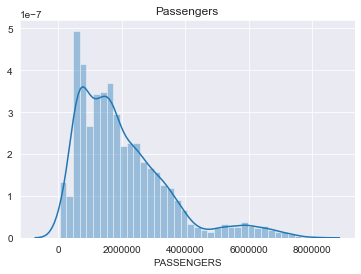

In [22]:
sns.distplot(df['PASSENGERS'])
plt.title('Passengers')

Text(0.5, 1.0, 'Temp')

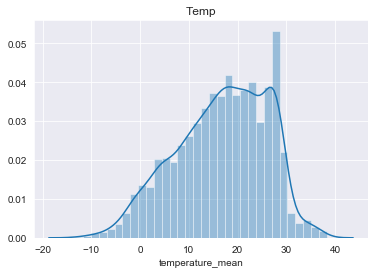

In [23]:
sns.distplot(df['temperature_mean'])
plt.title('Temp')

Text(0.5, 1.0, 'Precipitation')

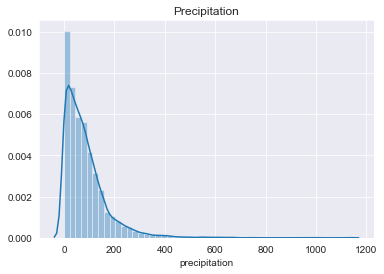

In [24]:
sns.distplot(df['precipitation'])
plt.title('Precipitation')

Text(0.5, 1.0, 'Cost of Living Index')

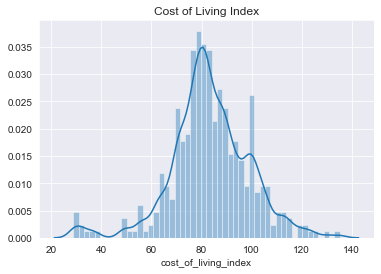

In [25]:
sns.distplot(df['cost_of_living_index'])
plt.title('Cost of Living Index')

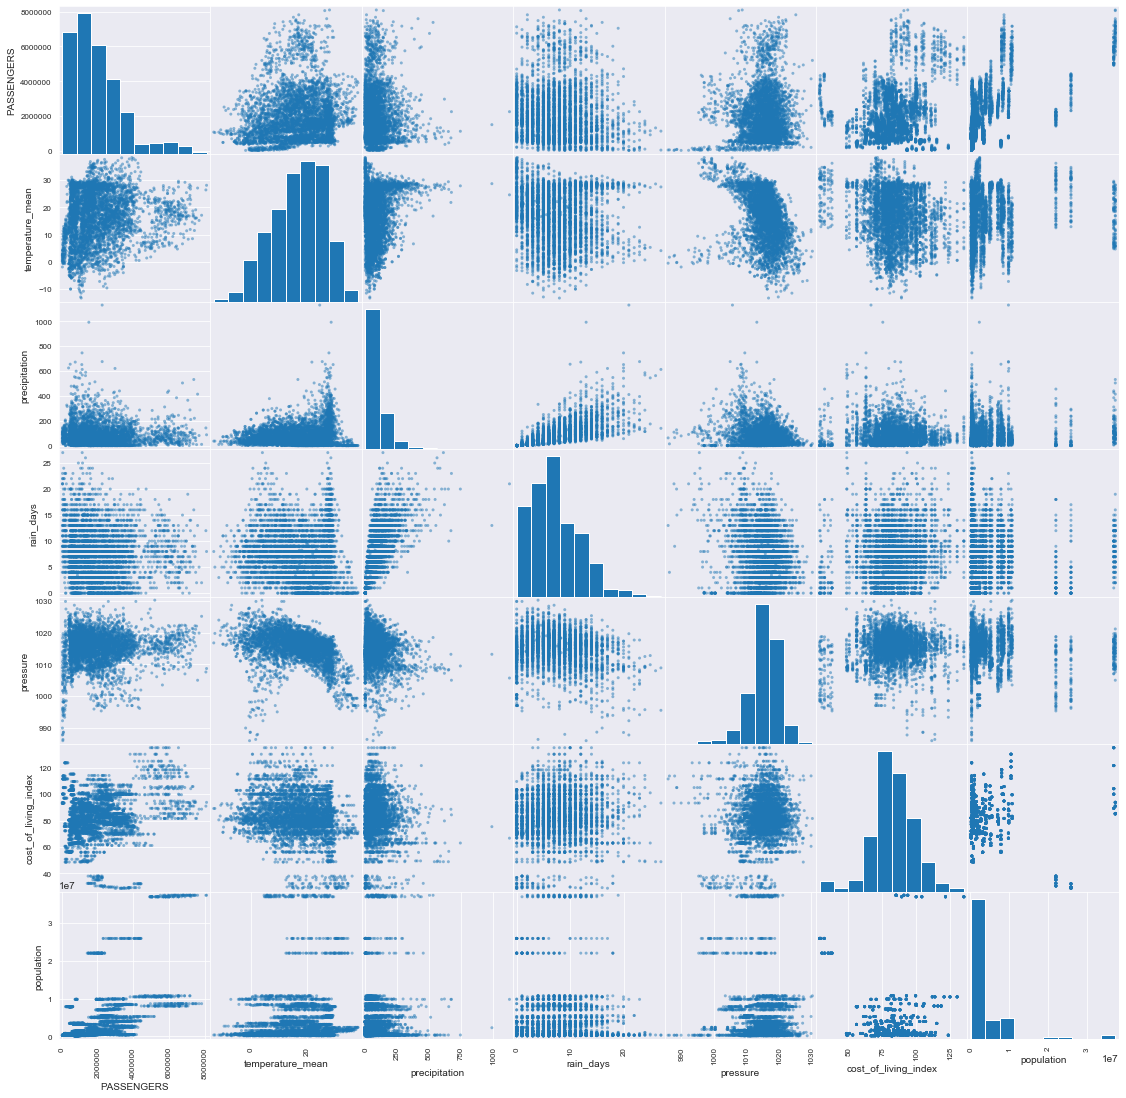

In [26]:
pd.plotting.scatter_matrix(numeric, figsize=[19, 19]);

### Rolling Average

In [27]:
df.head()

ds        city  PASSENGERS           Type  Month  Year  \
index                                                                  
0     2010-01-01     Atlanta     2735491       Domestic      1  2010   
1     2010-01-01  Washington     1929494       Domestic      1  2010   
2     2010-01-01   Singapore     1681005  International      1  2010   
3     2010-01-01      Berlin      489487  International      1  2010   
4     2010-01-01       Paris     4154249  International      1  2010   

       temperature_mean  precipitation  rain_days  pressure  \
index                                                         
0                   3.6          137.0        7.0   1019.50   
1                   0.4           57.0        8.0   1016.70   
2                  27.5           70.0        8.0   1011.60   
3                  -4.9           21.0        7.0   1014.78   
4                   0.6           36.0        7.0   1015.60   

       cost_of_living_index  population  city_ascii      lat       lng  \
index                                                                    
0                    100.99    429193.0     Atlanta  33.7627  -84.4225   
1                     98.19    605085.0  Washington  38.9047  -77.0163   
2                     65.94   5074252.0   Singapore   1.2930  103.8558   
3                    115.24   3450395.0      Berlin  52.5218   13.4015   
4                    130.30  10460118.0       Paris  48.8667    2.3333   

             country iso2 iso3  
index                           
0      United States   US  USA  
1      United States   US  USA  
2          Singapore   SG  SGP  
3            Germany   DE  DEU  
4             France   FR  FRA

In [31]:
averages = pd.DataFrame(df['PASSENGERS'].rolling(window=12, min_periods=3).mean())
averages.head()

PASSENGERS
index            
0             NaN
1             NaN
2      2115330.00
3      1708869.25
4      2197945.20

In [33]:
total_monthly = pd.DataFrame(df.groupby('ds')['PASSENGERS'].sum())
total_monthly

PASSENGERS
ds                    
2010-01-01    66007703
2010-02-01    62441983
2010-03-01    75979214
2010-04-01    72413634
2010-05-01    77667830
...                ...
2018-08-01   119201694
2018-09-01   105374394
2018-10-01   109180374
2018-11-01   100474772
2018-12-01   101474545

[108 rows x 1 columns]

In [34]:
moving_average = total_monthly.rolling(window=12, min_periods=3).mean()
moving_average.head()

PASSENGERS
ds                      
2010-01-01           NaN
2010-02-01           NaN
2010-03-01  6.814297e+07
2010-04-01  6.921063e+07
2010-05-01  7.090207e+07

In [193]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=moving_average.index, 
                         y=moving_average['PASSENGERS'], 
                         mode='lines', 
                         name='Moving Average'))
fig.add_trace(go.Scatter(x=total_monthly.index, 
                         y=total_monthly['PASSENGERS'],
                         mode='lines',
                         name='Passenger Volume',
                         line_color='rgb(200,0,100)'))
fig.add_trace(go.Scatter(x=total_monthly.rolling(window = 12, center = False).std().index, 
                         y=total_monthly['PASSENGERS'],
                         mode='lines',
                         name='Standard Deviation',
                         line_color='rgb(100,0,100)'))


fig.update_layout(title='Total Passenger Volume Activity 2010-2018',
                  xaxis_title='Year',
                  yaxis_title='Number of Passengers')
fig.show()

We can see that there is a deterministic trend that consistently increased, and it is global (applies to the whole time series). ADDITIVE

#### Cost of Living Index

In [36]:
px.line(df, 
        x="Year", 
        y="cost_of_living_index", 
        title='Cost of Living Index',
        color = 'city'
        )

### Seasonal Decompose

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



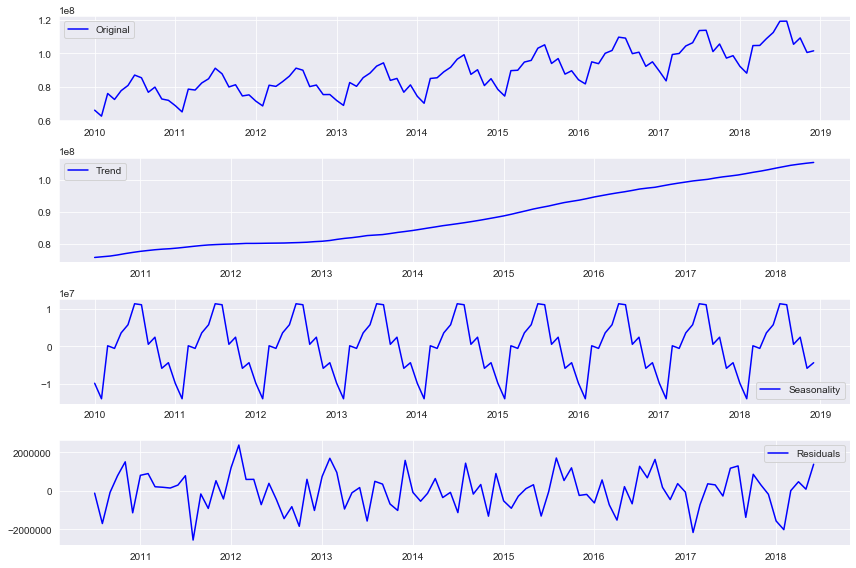

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(total_monthly)

# Gather the trend, seasonality and noise of decomposed object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(total_monthly, label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

### Dickey Fuller Test

In [38]:
def stationarity_check(df):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    rolmean = df.rolling(window = 8, center = False).mean()
    rolstd = df.rolling(window = 8, center = False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(df['PASSENGERS']) # change the passengers column as required 
    
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(df, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
    return None

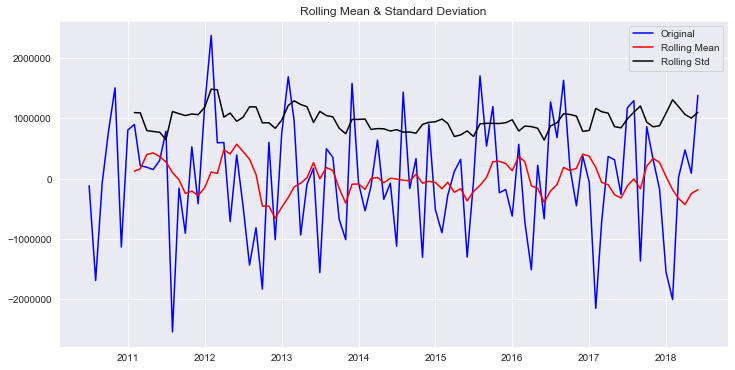

Results of Dickey-Fuller Test:
Test Statistic                 -3.687963
p-value                         0.004286
#Lags Used                     11.000000
Number of Observations Used    84.000000
Critical Value (1%)            -3.510712
Critical Value (5%)            -2.896616
Critical Value (10%)           -2.585482
dtype: float64


In [39]:
df_log_decompose = residual
df_log_decompose.dropna(inplace=True)

# Check stationarity
stationarity_check(df_log_decompose)

The Dickey-Fuller test tests the null hypothesis that the data is not stationary. Therefore, a low p-value <0.01 means we can reject the null hypothesis and be very confident that our data is stationary.

In [40]:
df

ds           city  PASSENGERS           Type  Month  Year  \
index                                                                     
0     2010-01-01        Atlanta     2735491       Domestic      1  2010   
1     2010-01-01     Washington     1929494       Domestic      1  2010   
2     2010-01-01      Singapore     1681005  International      1  2010   
3     2010-01-01         Berlin      489487  International      1  2010   
4     2010-01-01          Paris     4154249  International      1  2010   
...          ...            ...         ...            ...    ...   ...   
4747  2018-12-01      Las Vegas     1728205       Domestic     12  2018   
4748  2018-12-01  New York City     3794306       Domestic     12  2018   
4749  2018-12-01    Minneapolis     1295947       Domestic     12  2018   
4750  2018-12-01    Los Angeles     3491734       Domestic     12  2018   
4751  2018-12-01          Miami     2267294       Domestic     12  2018   

       temperature_mean  precipitation  rain_days  pressure  \
index                                                         
0                   3.6          137.0        7.0   1019.50   
1                   0.4           57.0        8.0   1016.70   
2                  27.5           70.0        8.0   1011.60   
3                  -4.9           21.0        7.0   1014.78   
4                   0.6           36.0        7.0   1015.60   
...                 ...            ...        ...       ...   
4747                2.9           28.0        4.0   1021.40   
4748                4.7          175.0       11.0   1019.10   
4749               -3.3           39.0        4.0   1018.50   
4750               14.8           37.0        2.0   1017.90   
4751               22.2           40.0        2.0   1019.20   

       cost_of_living_index  population     city_ascii      lat       lng  \
index                                                                       
0                    100.99    429193.0        Atlanta  33.7627  -84.4225   
1                     98.19    605085.0     Washington  38.9047  -77.0163   
2                     65.94   5074252.0      Singapore   1.2930  103.8558   
3                    115.24   3450395.0         Berlin  52.5218   13.4015   
4                    130.30  10460118.0          Paris  48.8667    2.3333   
...                     ...         ...            ...      ...       ...   
4747                  70.97    644644.0      Las Vegas  36.2333 -115.2654   
4748                 100.00   8398748.0  New York City  40.6943  -73.9249   
4749                  81.46    425403.0    Minneapolis  44.9635  -93.2678   
4750                  82.30   3990456.0    Los Angeles  34.1139 -118.4068   
4751                  86.01    470914.0          Miami  25.7839  -80.2102   

             country iso2 iso3  
index                           
0      United States   US  USA  
1      United States   US  USA  
2          Singapore   SG  SGP  
3            Germany   DE  DEU  
4             France   FR  FRA  
...              ...  ...  ...  
4747   United States   US  USA  
4748   United States   US  USA  
4749   United States   US  USA  
4750   United States   US  USA  
4751   United States   US  USA  

[4752 rows x 18 columns]

## Map

In [41]:
import plotly.graph_objects as go

In [57]:
df[df['city'] == 'Athens']

ds    city  PASSENGERS           Type  Month  Year  \
index                                                              
8     2010-01-01  Athens      713100  International      1  2010   
9     2010-01-01  Athens      713100  International      1  2010   
52    2010-02-01  Athens      665100  International      2  2010   
53    2010-02-01  Athens      665100  International      2  2010   
96    2010-03-01  Athens      809000  International      3  2010   
...          ...     ...         ...            ...    ...   ...   
4623  2018-10-01  Athens     2207100  International     10  2018   
4695  2018-11-01  Athens     1623600  International     11  2018   
4696  2018-11-01  Athens     1623600  International     11  2018   
4732  2018-12-01  Athens     1555400  International     12  2018   
4733  2018-12-01  Athens     1555400  International     12  2018   

       temperature_mean  precipitation  rain_days  pressure  \
index                                                         
8                   4.4          157.0        5.0    1019.0   
9                   4.4          157.0        5.0    1019.0   
52                  4.1          107.0        7.0    1015.0   
53                  4.1          107.0        7.0    1015.0   
96                 11.0           61.0        6.0    1013.4   
...                 ...            ...        ...       ...   
4623               19.1          108.0        5.0    1018.8   
4695                9.6          187.0       12.0    1019.4   
4696                9.6          187.0       12.0    1019.4   
4732                8.6          277.0       13.0    1019.5   
4733                8.6          277.0       13.0    1019.5   

       cost_of_living_index  population city_ascii      lat      lng  \
index                                                                  
8                     71.36   3179434.0     Athens  37.9833  23.7333   
9                     71.36   3179434.0     Athens  33.9508 -83.3689   
52                    71.36   3179434.0     Athens  37.9833  23.7333   
53                    71.36   3179434.0     Athens  33.9508 -83.3689   
96                    71.36   3179434.0     Athens  37.9833  23.7333   
...                     ...         ...        ...      ...      ...   
4623                  64.67   3179434.0     Athens  33.9508 -83.3689   
4695                  64.67   3179434.0     Athens  37.9833  23.7333   
4696                  64.67   3179434.0     Athens  33.9508 -83.3689   
4732                  64.67   3179434.0     Athens  37.9833  23.7333   
4733                  64.67   3179434.0     Athens  33.9508 -83.3689   

             country iso2 iso3  
index                           
8             Greece   GR  GRC  
9      United States   US  USA  
52            Greece   GR  GRC  
53     United States   US  USA  
96            Greece   GR  GRC  
...              ...  ...  ...  
4623   United States   US  USA  
4695          Greece   GR  GRC  
4696   United States   US  USA  
4732          Greece   GR  GRC  
4733   United States   US  USA  

[216 rows x 18 columns]

In [60]:
grouped_city_averages =df.groupby(['city', 'Type'])['PASSENGERS', 'lat', 'lng'].mean().reset_index().sort_values(by='PASSENGERS', ascending=False)
grouped_city_averages

city           Type    PASSENGERS      lat        lng
40           Tokyo  International  6.156525e+06  35.6850  139.75140
18          London  International  6.107012e+06  51.5000   -0.11670
24           Paris  International  5.370523e+06  48.8667    2.33330
2          Atlanta       Domestic  3.519556e+06  33.7627  -84.42250
22   New York City       Domestic  3.327171e+06  40.6943  -73.92490
3        Barcelona  International  3.267139e+06  41.3833    2.18340
30            Rome  International  3.260747e+06  41.8960   12.48330
7          Chicago       Domestic  3.260544e+06  41.8373  -87.68620
19     Los Angeles       Domestic  2.997224e+06  34.1139 -118.40680
13           Dubai  International  2.895379e+06  25.2300   55.28000
9           Dallas       Domestic  2.681095e+06  32.7936  -96.76620
10           Delhi  International  2.668357e+06  28.6700   77.23000
14       Hong Kong  International  2.608696e+06  22.3050  114.18500
41      Washington       Domestic  2.404971e+06  38.9047  -77.01630
0        Amsterdam  International  2.380959e+06  52.3500    4.91660
35           Seoul  International  2.379137e+06  37.5663  126.99970
33   San Francisco       Domestic  2.334041e+06  37.7562 -122.44300
36       Singapore  International  2.239067e+06   1.2930  103.85580
11          Denver       Domestic  2.168543e+06  39.7621 -104.87590
16         Houston       Domestic  1.717955e+06  29.7869  -95.39050
20           Miami       Domestic  1.698278e+06  25.7839  -80.21020
26         Phoenix       Domestic  1.660798e+06  33.5722 -112.08910
17       Las Vegas       Domestic  1.632442e+06  36.2333 -115.26540
6        Charlotte       Domestic  1.624532e+06  35.2079  -80.83040
34         Seattle       Domestic  1.421757e+06  47.6211 -122.32440
23         Orlando       Domestic  1.389478e+06  28.4772  -81.33690
5           Boston       Domestic  1.384216e+06  42.3188  -71.08460
1           Athens  International  1.381016e+06  37.9833   23.73330
21     Minneapolis       Domestic  1.314430e+06  44.9635  -93.26780
12         Detroit       Domestic  1.216359e+06  42.3834  -83.10240
25    Philadelphia       Domestic  1.079329e+06  40.0077  -75.13390
27          Phuket  International  1.026310e+06   7.8765   98.38150
31  Salt Lake City       Domestic  8.505801e+05  40.7774 -111.93000
32       San Diego       Domestic  7.808383e+05  32.8312 -117.12250
39           Tampa       Domestic  7.672723e+05  27.9942  -82.44510
4           Berlin  International  7.498923e+05  52.5218   13.40150
28        Portland       Domestic  6.467726e+05  44.6072  -96.46075
8          Croatia  International  6.019907e+05  45.8000   16.00000
15        Honolulu       Domestic  5.880807e+05  21.3294 -157.84600
37       St. Louis       Domestic  5.351846e+05  38.6358  -90.24510
38          Taipei  International  4.701307e+05  25.0358  121.56830
29       Reykjavik  International  1.374172e+05  64.1500  -21.95000

In [133]:
grouped_city_averages['text'] = grouped_city_averages['city'] + '<br>Average Monthly Arriving Passengers ' + (grouped_city_averages['PASSENGERS']/1e6).astype(str)+' million'
limits = [(0,3),(4,10),(11,20),(21,30),(31,41)]
colors = ["royalblue","crimson","lightseagreen","orange","lightgrey"]
text = ['Top 3', '4-10', '11-20', '21-30', '31-41']
cities = []
scale = 5000

fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    df_sub = grouped_city_averages[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        locationmode = 'ISO-3',
        lon = df_sub['lng'],
        lat = df_sub['lat'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub['PASSENGERS']/scale,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0]+1,lim[1]+1)))

fig.update_layout(
        title_text = 'Average Arriving Passenger Volume of Destinations<br>(Click legend to toggle traces)',
        showlegend = True,
        geo = dict(
#             showocean= True,
#             oceancolor='#3399FF',
            showlakes = True,
            showcountries = True,
            countrycolor = '#ffffff',
            coastlinecolor = '#ffffff',
            showsubunits = True,
            subunitcolor = '#ffffff',
            framecolor = '#ffffff',
            scope = 'world',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.show()

In [92]:
df.head()

ds        city  PASSENGERS           Type  Month  Year  \
index                                                                  
0     2010-01-01     Atlanta     2735491       Domestic      1  2010   
1     2010-01-01  Washington     1929494       Domestic      1  2010   
2     2010-01-01   Singapore     1681005  International      1  2010   
3     2010-01-01      Berlin      489487  International      1  2010   
4     2010-01-01       Paris     4154249  International      1  2010   

       temperature_mean  precipitation  rain_days  pressure  \
index                                                         
0                   3.6          137.0        7.0   1019.50   
1                   0.4           57.0        8.0   1016.70   
2                  27.5           70.0        8.0   1011.60   
3                  -4.9           21.0        7.0   1014.78   
4                   0.6           36.0        7.0   1015.60   

       cost_of_living_index  population  city_ascii      lat       lng  \
index                                                                    
0                    100.99    429193.0     Atlanta  33.7627  -84.4225   
1                     98.19    605085.0  Washington  38.9047  -77.0163   
2                     65.94   5074252.0   Singapore   1.2930  103.8558   
3                    115.24   3450395.0      Berlin  52.5218   13.4015   
4                    130.30  10460118.0       Paris  48.8667    2.3333   

             country iso2 iso3  
index                           
0      United States   US  USA  
1      United States   US  USA  
2          Singapore   SG  SGP  
3            Germany   DE  DEU  
4             France   FR  FRA

In [46]:
domesticdf = grouped_city_averages[grouped_city_averages['Type'] == 'Domestic']

In [47]:
domesticdf['text'] = domesticdf['city'] + '<br>Passengers ' + (df['PASSENGERS']/1e6).astype(str)+' million'
limits = [(0,2),(3,8),(9,15),(16,20),(21,30)]
colors = ["royalblue","crimson","lightseagreen","orange","lightgrey"]
cities = []
scale = 5000

fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    df_sub = domesticdf[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['lng'],
        lat = df_sub['lat'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub['PASSENGERS']/scale,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1])))

fig.update_layout(
        title_text = 'Domestic Flight Passenger Volume',
        showlegend = True,
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [82]:
fig = px.scatter_geo(df, locations="iso3", color="city",
                     hover_name="city", size="PASSENGERS",
                     animation_frame="Year",
                     projection="natural earth")
fig.show()

In [54]:
df.head()

ds        city  PASSENGERS           Type  Month  Year  \
index                                                                  
0     2010-01-01     Atlanta     2735491       Domestic      1  2010   
1     2010-01-01  Washington     1929494       Domestic      1  2010   
2     2010-01-01   Singapore     1681005  International      1  2010   
3     2010-01-01      Berlin      489487  International      1  2010   
4     2010-01-01       Paris     4154249  International      1  2010   

       temperature_mean  precipitation  rain_days  pressure  \
index                                                         
0                   3.6          137.0        7.0   1019.50   
1                   0.4           57.0        8.0   1016.70   
2                  27.5           70.0        8.0   1011.60   
3                  -4.9           21.0        7.0   1014.78   
4                   0.6           36.0        7.0   1015.60   

       cost_of_living_index  population  city_ascii      lat       lng  \
index                                                                    
0                    100.99    429193.0     Atlanta  33.7627  -84.4225   
1                     98.19    605085.0  Washington  38.9047  -77.0163   
2                     65.94   5074252.0   Singapore   1.2930  103.8558   
3                    115.24   3450395.0      Berlin  52.5218   13.4015   
4                    130.30  10460118.0       Paris  48.8667    2.3333   

             country iso2 iso3  
index                           
0      United States   US  USA  
1      United States   US  USA  
2          Singapore   SG  SGP  
3            Germany   DE  DEU  
4             France   FR  FRA